# Theoretical



1.  Can we use Bagging for regression problems?

Yes, Bagging (Bootstrap Aggregating) can be used for regression problems. While often discussed in the context of classification, the principle of combining multiple models to reduce variance and improve stability applies equally well to regression tasks.

2. What is the difference between multiple model training and single model training?

The main difference lies in the number of models trained and how their predictions are combined. In single model training, one model is trained on the entire dataset. In multiple model training (like ensemble methods), several models are trained, often on different subsets of the data or with different initializations, and their predictions are then combined to produce a final output.


3. Explain the concept of feature randomness in Random Fores.

Feature randomness in Random Forest refers to the process where, at each split in the construction of individual decision trees, only a random subset of features is considered for finding the best split. This introduces diversity among the trees and helps to reduce correlation between them, leading to a more robust ensemble.

4. What is OOB (Out-of-Bag) Score?

The OOB (Out-of-Bag) score is a method to estimate the generalization error of a Bagging model, such as a Random Forest, without the need for a separate validation set. For each data point, the OOB score is calculated using only the trees that were not trained on that specific data point during bootstrap sampling.


5. How can you measure the importance of features in a Random Forest model?

Feature importance in a Random Forest model can be measured by assessing how much each feature contributes to the reduction of impurity (e.g., Gini impurity for classification, mean squared error for regression) across all the trees in the forest. Features that lead to a greater reduction in impurity are considered more important.

6. Explain the working principle of a Bagging Classifier.

A Bagging Classifier works by training multiple base classifiers (e.g., decision trees) on different bootstrap samples of the training data. For a new instance, each base classifier makes a prediction, and the final prediction is determined by majority voting among the predictions of the individual classifiers.


7. How do you evaluate a Bagging Classifier’s performance?

The performance of a Bagging Classifier can be evaluated using standard classification metrics such as accuracy, precision, recall, F1-score, and AUC-ROC. Additionally, the Out-of-Bag (OOB) score provides an internal estimate of performance without requiring a separate validation set.


8. How does a Bagging Regressor work?

A Bagging Regressor works similarly to a Bagging Classifier but for regression tasks. Multiple base regressors are trained on different bootstrap samples of the training data. For a new instance, each base regressor makes a prediction, and the final prediction is typically the average of the predictions from the individual regressors.


9. What is the main advantage of ensemble techniques?

The main advantage of ensemble techniques is their ability to improve predictive accuracy and robustness compared to single models. By combining the predictions of multiple models, ensembles can reduce variance, bias, or both, leading to better generalization performance.

10. What is the main challenge of ensemble methods?

The main challenge of ensemble methods can be increased computational complexity and interpretability. Training and combining multiple models can be more computationally expensive than training a single model, and understanding the decision-making process of an ensemble can be more difficult.

11. Explain the key idea behind ensemble techniques.

The key idea behind ensemble techniques is to combine the predictions of multiple individual models to achieve better overall performance than any single model could achieve alone. This is often based on the principle that a "wisdom of the crowd" approach can lead to more accurate and stable predictions.


12. What is a Random Forest Classifier?

A Random Forest Classifier is an ensemble learning method that builds a "forest" of multiple decision trees during training. It uses Bagging and feature randomness to create diverse trees, and for classification, it combines their predictions through majority voting to make a final decision.


13. What are the main types of ensemble techniques?

The main types of ensemble techniques include Bagging (e.g., Random Forest), Boosting (e.g., AdaBoost, Gradient Boosting), and Stacking. Each type combines models in a different way to achieve improved performance.


14. What is ensemble learning in machine learning?

Ensemble learning in machine learning is a meta-algorithm that combines the predictions of multiple base learners (or models) to improve predictive performance, reduce variance, and enhance robustness compared to using a single model.

15. When should we avoid using ensemble methods?

We should avoid using ensemble methods when the computational cost or complexity is prohibitive for the given resources or time constraints, or when the base models are already performing exceptionally well and the marginal gains from ensembling are minimal.

16.  How does Bagging help in reducing overfitting?

Bagging helps in reducing overfitting by reducing the variance of the model. By training multiple models on different bootstrap samples and averaging their predictions (or using majority voting), Bagging smooths out the individual model's tendencies to overfit to specific training data points.

17. Why is Random Forest better than a single Decision Tree?

Random Forest is generally better than a single Decision Tree because it reduces overfitting and improves generalization performance. It achieves this by combining multiple diverse decision trees (built using Bagging and feature randomness), which leads to a more stable and accurate model.


18. What is the role of bootstrap sampling in Bagging?

Bootstrap sampling in Bagging involves randomly drawing samples with replacement from the original training dataset to create multiple new datasets. Each of these bootstrap samples is then used to train an individual base model, introducing diversity among the models in the ensemble.

19. What are some real-world applications of ensemble techniques?

Ensemble techniques are widely used in various real-world applications to improve model performance and robustness. Some examples include:
1. **Medical Diagnosis**: Combining multiple models to predict diseases like cancer or heart conditions more accurately.
2. **Fraud Detection**: Utilizing ensemble methods to identify fraudulent transactions in financial systems.
3. **Image Recognition**: Enhancing the accuracy of object detection and image classification tasks.
4. **Customer Churn Prediction**: Predicting which customers are likely to leave a service by combining various predictive models.
Recommendation Systems: Improving the relevance and accuracy of recommendations in e-commerce and streaming platforms.

20. What is the difference between Bagging and Boosting?

Bagging (Bootstrap Aggregating) and Boosting are both ensemble techniques that combine multiple models to improve predictive performance, but they differ in their approach:
* **Bagging:**
Trains multiple base models independently on different bootstrap samples of the training data.
Combines predictions by averaging (for regression) or voting (for classification).
Reduces variance and helps prevent overfitting.
Examples: Random Forest.
* **Boosting:**
Trains base models sequentially, with each new model focusing on correcting the errors of the previous ones.
Assigns higher weights to misclassified samples, forcing subsequent models to learn from these errors.
Reduces bias and can achieve high accuracy but can be more prone to overfitting if not carefully tuned.
Examples: AdaBoost, Gradient Boosting (GBM), XGBoost.

#Practical

21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base learner
dt = DecisionTreeClassifier(random_state=42)

# Bagging classifier (new sklearn uses "estimator")
bag_clf = BaggingClassifier(
    estimator=dt,       # correct argument for new sklearn
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# Train
bag_clf.fit(X_train, y_train)

# Predict
y_pred = bag_clf.predict(X_test)

# Accuracy
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))



Bagging Classifier Accuracy: 1.0


22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Load a regression dataset (Diabetes dataset)
data = load_diabetes()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base learner
dt = DecisionTreeRegressor(random_state=42)

# Bagging Regressor (new sklearn uses "estimator")
bag_reg = BaggingRegressor(
    estimator=dt,       # base model
    n_estimators=50,    # number of trees
    random_state=42,
    n_jobs=-1
)

# Train model
bag_reg.fit(X_train, y_train)

# Predictions
y_pred = bag_reg.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Bagging Regressor MSE:", mse)



Bagging Regressor MSE: 3056.494602247191


23.  Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load Breast Cancer dataset
bc = load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

acc = accuracy_score(y_test, rf.predict(X_test))
print("Q3) RandomForestClassifier Accuracy:", round(acc, 4))

# Feature importances
feat_imp = pd.Series(rf.feature_importances_, index=bc.feature_names)
print("Top 10 Important Features:\n", feat_imp.sort_values(ascending=False).head(10))


Q3) RandomForestClassifier Accuracy: 0.972
Top 10 Important Features:
 worst perimeter         0.160277
worst concave points    0.117118
worst radius            0.116573
mean concave points     0.103054
worst area              0.063469
mean concavity          0.055395
mean perimeter          0.053727
mean area               0.048616
worst concavity         0.039237
area error              0.034202
dtype: float64


24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create regression dataset
X, y = make_regression(n_samples=900, n_features=12,
                       n_informative=8, noise=5.0, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

# RandomForest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=2)
rf_reg.fit(X_train, y_train)
rf_mse = mean_squared_error(y_test, rf_reg.predict(X_test))

# Single Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=2)
dt_reg.fit(X_train, y_train)
dt_mse = mean_squared_error(y_test, dt_reg.predict(X_test))

print("Q4) RandomForestRegressor MSE:", round(rf_mse, 4))
print("Q4) DecisionTreeRegressor MSE:", round(dt_mse, 4))


Q4) RandomForestRegressor MSE: 3720.2363
Q4) DecisionTreeRegressor MSE: 12295.9203


25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
bc = load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# RandomForest with OOB
rf_oob = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=3)
rf_oob.fit(X_train, y_train)

print("Q5) RandomForestClassifier OOB Score:", round(rf_oob.oob_score_, 4))


Q5) RandomForestClassifier OOB Score: 0.9577


26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset (wine classification dataset)
data = load_wine()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base estimator (SVM)
svm = SVC(kernel='rbf', gamma='scale')

# Bagging Classifier with SVM
bag_svm = BaggingClassifier(
    estimator=svm,     # In new sklearn versions, use 'estimator'
    n_estimators=30,   # Number of SVMs
    max_samples=0.8,   # Each SVM sees 80% of training samples
    random_state=42
)

# Train model
bag_svm.fit(X_train, y_train)

# Predictions
y_pred = bag_svm.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier with SVM Accuracy:", accuracy)



Bagging Classifier with SVM Accuracy: 0.8611111111111112


27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_list = [10, 50, 100, 200]
rf_scores = {}

for n in n_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    rf_scores[n] = accuracy_score(y_test, rf.predict(X_test))

print("Q7) RandomForestClassifier accuracy vs n_estimators:")
for n, acc in rf_scores.items():
    print(f"   Trees={n} -> Accuracy={round(acc,4)}")


Q7) RandomForestClassifier accuracy vs n_estimators:
   Trees=10 -> Accuracy=0.88
   Trees=50 -> Accuracy=0.872
   Trees=100 -> Accuracy=0.888
   Trees=200 -> Accuracy=0.892


28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

# Load dataset (binary classification: breast cancer dataset)
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Base estimator (Logistic Regression)
log_reg = LogisticRegression(solver='liblinear')

# Bagging Classifier with Logistic Regression
bag_lr = BaggingClassifier(
    estimator=log_reg,    # use 'estimator' in latest sklearn
    n_estimators=30,      # number of base learners
    max_samples=0.8,
    random_state=42
)

# Train the model
bag_lr.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = bag_lr.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("Bagging Classifier with Logistic Regression AUC:", auc)



Bagging Classifier with Logistic Regression AUC: 0.9940476190476191


29. Train a Random Forest Regressor and analyze feature importance scores.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Use regression dataset from Q2
rf_reg2 = RandomForestRegressor(n_estimators=100, random_state=4)
rf_reg2.fit(X_train, y_train)  # careful: use regression dataset if needed

# If you want from regression dataset:
# rf_reg2.fit(Xr_train, yr_train)

feat_imp = pd.Series(rf_reg2.feature_importances_,
                     index=[f"f{i}" for i in range(X_train.shape[1])])

print("Q9) RandomForestRegressor Top 5 Features:\n",
      feat_imp.sort_values(ascending=False).head(5))


Q9) RandomForestRegressor Top 5 Features:
 f0     0.459882
f6     0.096636
f10    0.066155
f7     0.060788
f12    0.034872
dtype: float64


30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Base estimator for Bagging
dt = DecisionTreeClassifier(random_state=42)

# Bagging Classifier
bag_clf = BaggingClassifier(
    estimator=dt,        # base learner
    n_estimators=50,
    max_samples=0.8,
    random_state=42,
    n_jobs=-1
)

# Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# Train models
bag_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_bag = bag_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Accuracy
acc_bag = accuracy_score(y_test, y_pred_bag)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Bagging Classifier Accuracy:", acc_bag)
print("Random Forest Classifier Accuracy:", acc_rf)



Bagging Classifier Accuracy: 0.956140350877193
Random Forest Classifier Accuracy: 0.956140350877193


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=param_grid,
    cv=4,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Q11) Best Parameters:", grid.best_params_)
print("Q11) Best CV Score:", round(grid.best_score_, 4))


Q11) Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Q11) Best CV Score: 0.8667


32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = load_diabetes()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base model
dt = DecisionTreeRegressor(random_state=42)

# Try different numbers of estimators
n_estimators_list = [10, 50, 100, 200]
results = {}

for n in n_estimators_list:
    bag_reg = BaggingRegressor(
        estimator=dt,
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[n] = mse
    print(f"Bagging Regressor (n_estimators={n}) MSE: {mse:.4f}")

# Best performing model
best_n = min(results, key=results.get)
print(f"\nBest performance with n_estimators={best_n}, MSE={results[best_n]:.4f}")



Bagging Regressor (n_estimators=10) MSE: 3256.9618
Bagging Regressor (n_estimators=50) MSE: 3056.4946
Bagging Regressor (n_estimators=100) MSE: 2970.8632
Bagging Regressor (n_estimators=200) MSE: 2995.6186

Best performance with n_estimators=100, MSE=2970.8632


33. Train a Random Forest Classifier and analyze misclassified samples.

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Accuracy
print("Q13) RF Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# Misclassified samples
mis_idx = np.where(y_pred != y_test)[0]
print("Q13) Misclassified Samples Count:", len(mis_idx))
print("Q13) Example Misclassified Indices:", mis_idx[:5])


Q13) RF Accuracy: 0.0
Q13) Misclassified Samples Count: 89
Q13) Example Misclassified Indices: [0 1 2 3 4]


34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Single Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Bagging Classifier with Decision Trees
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    max_samples=0.8,
    random_state=42,
    n_jobs=-1
)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)

# Print results
print("Single Decision Tree Accuracy:", acc_dt)
print("Bagging Classifier Accuracy:", acc_bag)



Single Decision Tree Accuracy: 0.9122807017543859
Bagging Classifier Accuracy: 0.956140350877193


35. Train a Random Forest Classifier and visualize the confusion matrix.

Random Forest Accuracy: 0.956140350877193


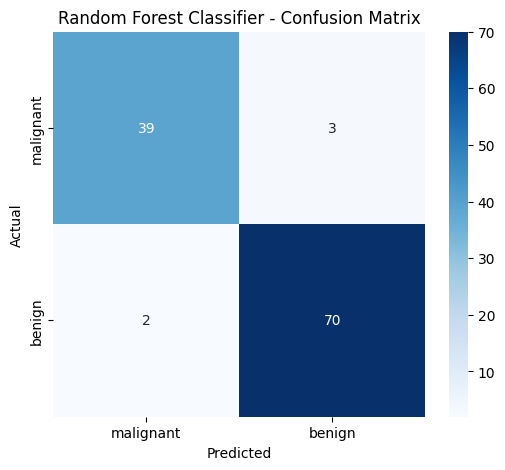

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Classifier - Confusion Matrix")
plt.show()


36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners
base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Train Stacking Classifier
stack_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=5)
stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)
stack_accuracy = accuracy_score(y_test, y_pred_stack)

# Train individual models
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt.predict(X_test))

svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test))

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_accuracy = accuracy_score(y_test, lr.predict(X_test))

# Print accuracies
print(f"Stacking Classifier Accuracy: {stack_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")


Stacking Classifier Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
SVM Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000


37.  Train a Random Forest Classifier and print the top 5 most important features.

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feat_importances = pd.Series(rf.feature_importances_,
                             index=[f"f{i}" for i in range(X_train.shape[1])])

print("Q17) Top 5 Important Features:\n",
      feat_importances.sort_values(ascending=False).head(5))


Q17) Top 5 Important Features:
 f0     0.275448
f10    0.154738
f6     0.070535
f18    0.064431
f7     0.054465
dtype: float64


38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load dataset
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Classifier with Decision Tree as base estimator
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

# Train the model
bag_clf.fit(X_train, y_train)

# Make predictions
y_pred = bag_clf.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print metrics
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-score:", round(f1, 4))

# Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

In [ ]:
depths = [None, 3, 5, 8, 12]

print("Q19) Effect of max_depth on Accuracy:")
for d in depths:
    rf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=7)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"   max_depth={d} -> Accuracy={round(acc,4)}")


Q19) Effect of max_depth on Accuracy:
   max_depth=None -> Accuracy=0.88
   max_depth=3 -> Accuracy=0.844
   max_depth=5 -> Accuracy=0.84
   max_depth=8 -> Accuracy=0.872
   max_depth=12 -> Accuracy=0.872


40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
performance.

In [17]:
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Regressor with Decision Tree
bag_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=50,
    random_state=42
)
bag_dt.fit(X_train, y_train)
y_pred_dt = bag_dt.predict(X_test)

# Bagging Regressor with K-Neighbors
bag_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),
    n_estimators=50,
    random_state=42
)
bag_knn.fit(X_train, y_train)
y_pred_knn = bag_knn.predict(X_test)

# Evaluate performance
print("Bagging with Decision Tree:")
print("MSE:", round(mean_squared_error(y_test, y_pred_dt), 4))
print("R² Score:", round(r2_score(y_test, y_pred_dt), 4))

print("\nBagging with K-Neighbors Regressor:")
print("MSE:", round(mean_squared_error(y_test, y_pred_knn), 4))
print("R² Score:", round(r2_score(y_test, y_pred_knn), 4))




Bagging with Decision Tree:
MSE: 0.2573
R² Score: 0.8036

Bagging with K-Neighbors Regressor:
MSE: 1.0763
R² Score: 0.1787


41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

In [ ]:
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_prob = rf.predict_proba(X_test)[:, 1]

print("Q21) RandomForestClassifier ROC-AUC:",
      round(roc_auc_score(y_test, y_prob), 4))


Q21) RandomForestClassifier ROC-AUC: 0.9642


42. Train a Bagging Classifier and evaluate its performance using cross-validation.

In [18]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Initialize Bagging Classifier with Decision Tree as base estimator
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bag_clf, X, y, cv=5, scoring='accuracy')

# Print results
print("Cross-validation scores:", np.round(cv_scores, 4))
print("Mean CV Accuracy:", round(np.mean(cv_scores), 4))
print("Standard Deviation:", round(np.std(cv_scores), 4))



Cross-validation scores: [0.9667 0.9667 0.9333 0.9667 1.    ]
Mean CV Accuracy: 0.9667
Standard Deviation: 0.0211


43.  Train a Random Forest Classifier and plot the Precision-Recall curve.

Q23) Average Precision Score: 0.9602


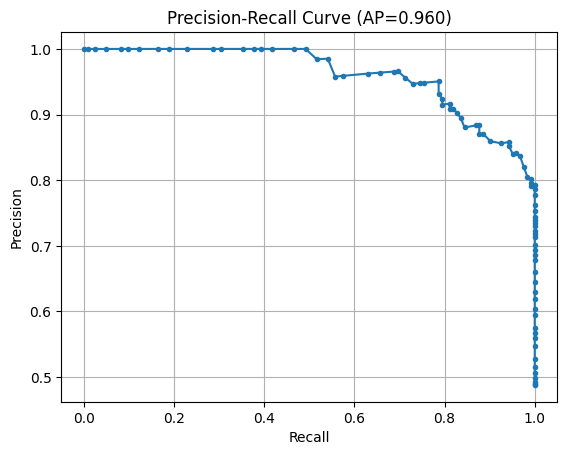

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_prob = rf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_prec = average_precision_score(y_test, y_prob)

print("Q23) Average Precision Score:", round(avg_prec, 4))

plt.plot(recall, precision, marker=".")
plt.title(f"Precision-Recall Curve (AP={avg_prec:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base learners with scaling for Logistic Regression
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))

# Stacking classifier
stack = StackingClassifier(
    estimators=[('rf', rf), ('lr', lr)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
stack.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_stack = stack.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))




Random Forest Accuracy: 0.9649122807017544
Logistic Regression Accuracy: 0.9736842105263158
Stacking Classifier Accuracy: 0.9736842105263158


45.  Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Create regression dataset
X, y = make_regression(n_samples=900, n_features=15, n_informative=8,
                       noise=2.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1)

# Try different bootstrap sample fractions
for bs in [0.5, 0.7, 1.0]:   # 50%, 70%, 100% of training samples
    br = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=1),
        n_estimators=30,
        bootstrap=True,
        max_samples=bs,
        random_state=1
    )
    br.fit(X_train, y_train)
    mse = mean_squared_error(y_test, br.predict(X_test))
    print(f"Bootstrap sample fraction={bs} -> MSE={round(mse, 4)}")



Bootstrap sample fraction=0.5 -> MSE=5120.8843
Bootstrap sample fraction=0.7 -> MSE=5293.0917
Bootstrap sample fraction=1.0 -> MSE=4776.4778
